In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

path = "user_artists.dat"
# Завантажуємо набір даних Last.fm
data = pd.read_csv(path, sep="\t")
print(data.shape)
data.head()


(92834, 3)


,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


# (92834, 3)

#    userID	    artistID	  weight
# 0	   2	      51	      13883
# 1	   2	      52	      11690
# 2	   2	      53	      11351
# 3	   2	      54	      10300
# 4	   2	      55	      8983

In [3]:
# Розбиваємо дані на навчальні та тестові набори
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Попередньо обробляємо дані
mlb = MultiLabelBinarizer()
train = mlb.fit_transform(train_data.groupby("userID")["artistID"].apply(list))
test = mlb.transform(test_data.groupby("userID")["artistID"].apply(list))
print(f"{train.shape} - {test.shape}")

(1890, 15394) - (1881, 15394)


c:\Users\Veronika\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) [10001, 10004, 10010, 10013, 10020, 10023, 10028, 10029, 10034, 10037, 10049, 10053, 10064, 10067, 10075, 10086, 10090, 10092, 10096, 10097, 10098, 1010, 10104, 10106, 10107, 10120, 10122, 10128, 10144, 10156, 10157, 10168, 10187, 10188, 10191, 10192, 10198, 10206, 10207, 10212, 1022, 10227, 10230, 10232, 10235, 10239, 10240, 10249, 10252, 10259, 10261, 10262, 10265, 10274, 10277, 10278, 10281, 10295, 10299, 10301, 10303, 10314, 10321, 10331, 10368, 10369, 10372, 10387, 10391, 10400, 10408, 10409, 10410, 10425, 10431, 10440, 10450, 10455, 10458, 10461, 10484, 10488, 10489, 1049, 10498, 10506, 10514, 10530, 10536, 10546, 10547, 10563, 10580, 10589, 10591, 10592, 10595, 10598, 10614, 10622, 10624, 1063, 10630, 10632, 10648, 10649, 10651, 10673, 10679, 10694, 10696, 10698, 10699, 10702, 10705, 10706, 10710, 10715, 10716, 10718, 10743, 10745, 10747

# (1890, 15394) - (1881, 15394)

In [4]:
# Визначаємо модель RBM
n_visible = len(mlb.classes_)
n_hidden = 64
rbm = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n_hidden, activation='sigmoid', input_shape=(n_visible,)),
    tf.keras.layers.Dense(n_visible, activation='sigmoid')
])

# Тренуємо модель RBM
batch_size = 32
epochs = 10
rbm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
rbm.fit(train, train, batch_size=batch_size, epochs=epochs)


Epoch 1/10

60/60 [==============================] - 3s 33ms/step - loss: 0.0157
Epoch 2/10
60/60 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 3/10
60/60 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 4/10
60/60 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 5/10
60/60 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 6/10
60/60 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 7/10
60/60 [==============================] - 2s 29ms/step - loss: 0.0025
Epoch 8/10
60/60 [==============================] - 2s 28ms/step - loss: 0.0025
Epoch 9/10
60/60 [==============================] - 2s 29ms/step - loss: 0.0025
Epoch 10/10
60/60 [==============================] - 2s 29ms/step - loss: 0.0025


In [5]:
# Прогнозуємо бінарні вектори для тестових користувачів
predicted_user_matrix = rbm.predict(test)

# Розраховуємо середньоквадратичну похибку
mse = np.mean((test - predicted_user_matrix) ** 2)
print("MSE: ", mse)

59/59 [==============================] - 0s 5ms/step
MSE:  0.0007402967052258506


# MSE:  0.0007366147992278984

1/1 [==============================] - 0s 49ms/step


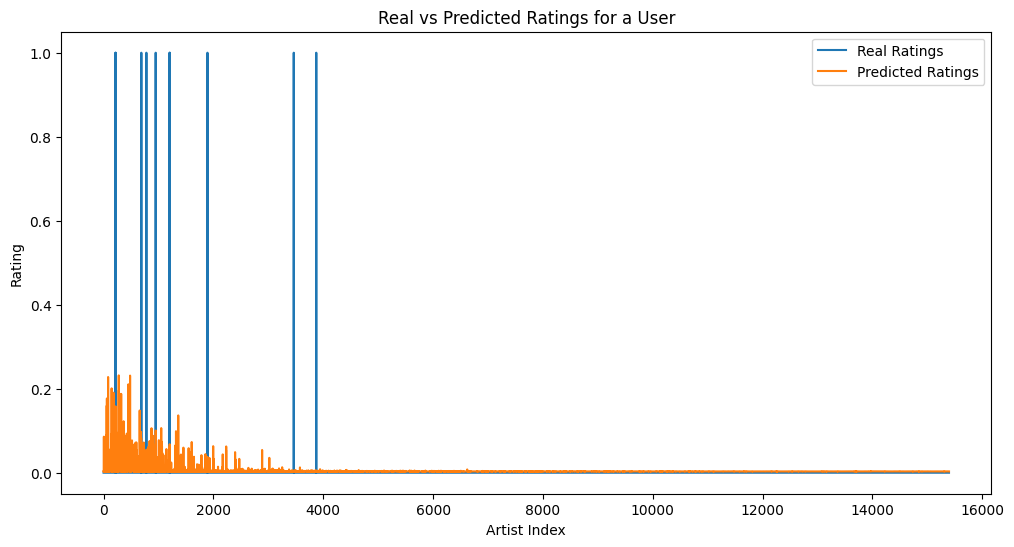

In [16]:
import matplotlib.pyplot as plt

# Вибір випадкового користувача
user_index = np.random.randint(test.shape[0])

# Прогнозуємо відгуки для вибраного користувача
predicted_user_ratings = rbm.predict(test[user_index:user_index + 1])

# Виводимо реальні та прогнозовані відгуки
plt.figure(figsize=(12, 6))
plt.plot(test[user_index], label='Real Ratings')
plt.plot(predicted_user_ratings.flatten(), label='Predicted Ratings')
plt.title('Real vs Predicted Ratings for a User')
plt.xlabel('Artist Index')
plt.ylabel('Rating')
plt.legend()
plt.show()

